# EDA-Example Note Project -1


**Introduction to EDA**

The main objective of this notebook is to cover the steps involved in Data pre-processing, Feature Engineering, and different stages of Exploratory Data Analysis, which is an essential step in any research analysis.

Data pre-processing, Feature Engineering, and EDA are fundamental early steps after data collection. Still, they are not limited to where the data is simply visualized, plotted, and manipulated, without any assumptions, to assess the quality of the data and building models.

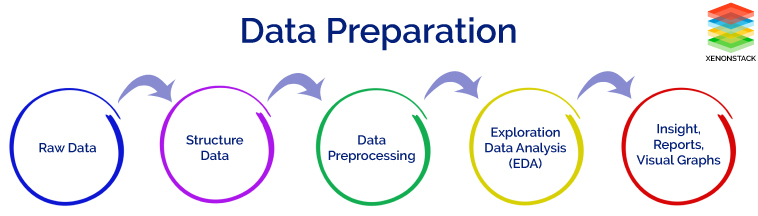


# 1: Getting the Right Environment 

**import Python Libraries**
The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

# 2: Reading and Understanding the Datasets 

Reading Dataset
The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

Dataset link:https://drive.google.com/file/d/1IC3G6cgnYU8yOA08C6CYMVoCu11mrBoF/view?usp=sharing![image.png](attachment:79215a46-1551-4ed1-8f73-96eb38bac1b7.png)![image.png](attachment:862a4ef8-b557-4218-97d4-432abc1d0776.png)![image.png](attachment:22ec4814-f650-43f5-95b9-3cd680f699f6.png)![image.png](attachment:9d27987c-1797-4ee3-99a7-98e2a6cad7d6.png)

Analyzing the data

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

shape – shape will display the number of observations(rows) and features(columns) in the dataset

In [25]:
df = pd.read_csv("monkey_pox.csv")
df

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


In [26]:
print(df.shape)

(25000, 11)


Check for duplication
nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [27]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
24995    False
24996    False
24997    False
24998    False
24999    False
Length: 25000, dtype: bool


In [28]:
print(df.duplicated().sum())

0


we can see that there are no duplicates rows in our dataset

In [29]:
print(df.nunique())

Patient_ID                        25000
Systemic Illness                      4
Rectal Pain                           2
Sore Throat                           2
Penile Oedema                         2
Oral Lesions                          2
Solitary Lesion                       2
Swollen Tonsils                       2
HIV Infection                         2
Sexually Transmitted Infection        2
MonkeyPox                             2
dtype: int64


Missing values Calculation
isnull() is widely been in all pre-processing steps to identify null values in the data

In our example, data.isnull().sum() is used to get the number of missing records in each column

The below code helps to calculate the percentage of missing values in each column

(data.isnull().sum()/(len(data)))*100

In [30]:
#finding missing values in the dataframe
print(df.isnull())

       Patient_ID  Systemic Illness  Rectal Pain  Sore Throat  Penile Oedema  \
0           False             False        False        False          False   
1           False             False        False        False          False   
2           False             False        False        False          False   
3           False             False        False        False          False   
4           False             False        False        False          False   
...           ...               ...          ...          ...            ...   
24995       False             False        False        False          False   
24996       False             False        False        False          False   
24997       False             False        False        False          False   
24998       False             False        False        False          False   
24999       False             False        False        False          False   

       Oral Lesions  Solitary Lesion  S

In [31]:
print(df.isnull().sum())

Patient_ID                        0
Systemic Illness                  0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Sexually Transmitted Infection    0
MonkeyPox                         0
dtype: int64


In [32]:
#percentage of missing values in each column
print((df.isnull().sum() / len(df)) * 100)

Patient_ID                        0.0
Systemic Illness                  0.0
Rectal Pain                       0.0
Sore Throat                       0.0
Penile Oedema                     0.0
Oral Lesions                      0.0
Solitary Lesion                   0.0
Swollen Tonsils                   0.0
HIV Infection                     0.0
Sexually Transmitted Infection    0.0
MonkeyPox                         0.0
dtype: float64


Data Reduction
Some columns or variables can be dropped if they do not add value to our analysis.

In [33]:
#dropping unwanted columns
df = df.drop(columns=['Patient_ID','Systemic Illness'])

In [34]:
df.columns

Index(['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

Feature Engineering
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

In [40]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'])

# Standardize numerical variables
scaler = StandardScaler()
df_encoded[['Rectal Pain', 'Penile Oedema']] = scaler.fit_transform(df_encoded[['Rectal Pain', 'Penile Oedema']])

# 3: Data Cleaning and Wrangling 

Data Cleaning/Wrangling
Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data.

In [44]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Rename 'Oral Lesions' to 'Mouth Lesions'
df.rename(columns={'Oral Lesions': 'Mouth Lesions'}, inplace=True)

# 4: EDA -Exploratory Data Analysis

EDA Exploratory Data Analysis
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data.
EDA helps to find meaningful patterns in data.
EDA provides in-depth insights into the data sets to solve our business problems.
EDA gives a clue to impute missing values in the dataset 

In [45]:
# Print the dimensions of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 512, Columns: 9


**Statistics Summary**
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

data.describe().T

In [46]:
# Print the data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 4459
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Rectal Pain                     512 non-null    bool  
 1   Sore Throat                     512 non-null    bool  
 2   Penile Oedema                   512 non-null    bool  
 3   Mouth Lesions                   512 non-null    bool  
 4   Solitary Lesion                 512 non-null    bool  
 5   Swollen Tonsils                 512 non-null    bool  
 6   HIV Infection                   512 non-null    bool  
 7   Sexually Transmitted Infection  512 non-null    bool  
 8   MonkeyPox                       512 non-null    object
dtypes: bool(8), object(1)
memory usage: 12.0+ KB
None


In [47]:
# Compute summary statistics for numerical variables
print(df.describe())

       Rectal Pain Sore Throat Penile Oedema Mouth Lesions Solitary Lesion  \
count          512         512           512           512             512   
unique           2           2             2             2               2   
top          False        True          True          True           False   
freq           256         256           256           256             256   

       Swollen Tonsils HIV Infection Sexually Transmitted Infection MonkeyPox  
count              512           512                            512       512  
unique               2             2                              2         2  
top               True         False                          False  Negative  
freq               256           256                            256       256  


In [48]:
df.describe().T

,count,unique,top,freq
Rectal Pain,512,2,False,256
Sore Throat,512,2,True,256
Penile Oedema,512,2,True,256
Mouth Lesions,512,2,True,256
Solitary Lesion,512,2,False,256
Swollen Tonsils,512,2,True,256
HIV Infection,512,2,False,256
Sexually Transmitted Infection,512,2,False,256
MonkeyPox,512,2,Negative,256


**EDA Univariate Analysis**
Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.


Text(0.5, 1.0, ' Distribution of HIV by target variable')

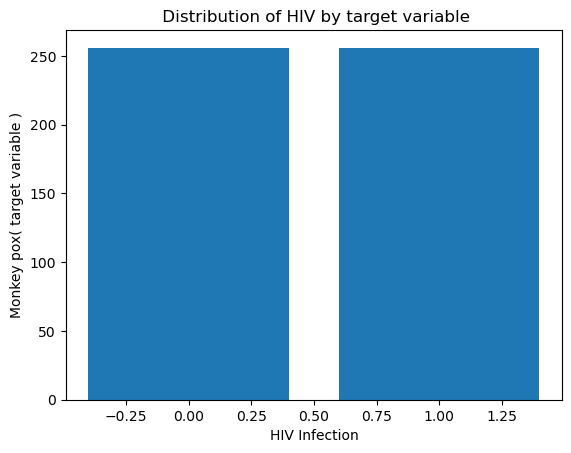

In [50]:
# Create a histogram of Rectal Pain
plt.hist(df['Rectal Pain'], bins=10)
plt.xlabel('Rectal Pain')
plt.ylabel('Frequency')
plt.show()

# Create a boxplot of Swollen Tonsils
sns.boxplot(x=df['Swollen Tonsils'])
plt.show()



x=df['HIV Infection'].value_counts().keys().tolist()
y=df['MonkeyPox'].value_counts().tolist()
plt.bar(x,y)
plt.xlabel("HIV Infection")
plt.ylabel("Monkey pox( target variable )")
plt.title(" Distribution of HIV by target variable")

**Data Transformation**
Before we proceed to Bi-variate Analysis, Univariate analysis demonstrated the data pattern as some variables to be transformed.

Log transformation can help in normalization, so this variable can maintain standard scale with other variables:

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns to be normalized
num_cols = ['Rectal Pain', 'Penile Oedema']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

**EDA Bivariate Analysis**
Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In [53]:
# Calculate correlation coefficients
corr_matrix = df_encoded.corr()
corr_matrix

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection_False,HIV Infection_True,Sexually Transmitted Infection_False,Sexually Transmitted Infection_True,MonkeyPox_Negative,MonkeyPox_Positive
Rectal Pain,1.000000,0.006214,0.005312,0.007747,0.001147,0.002113,-0.005764,0.005764,-0.000666,0.000666,-0.140727,0.140727
Sore Throat,0.006214,1.000000,0.009082,-0.000795,-0.003609,-0.002011,-0.000771,0.000771,0.001901,-0.001901,-0.063385,0.063385
Penile Oedema,0.005312,0.009082,1.000000,0.003850,0.002781,0.000536,-0.003620,0.003620,0.005722,-0.005722,-0.061905,0.061905
Oral Lesions,0.007747,-0.000795,0.003850,1.000000,-0.005198,-0.007757,0.012153,-0.012153,0.002725,-0.002725,-0.051955,0.051955
Solitary Lesion,0.001147,-0.003609,0.002781,-0.005198,1.000000,0.002874,0.002335,-0.002335,-0.009849,0.009849,-0.037471,0.037471
Swollen Tonsils,0.002113,-0.002011,0.000536,-0.007757,0.002874,1.000000,0.004258,-0.004258,0.006469,-0.006469,-0.013221,0.013221
HIV Infection_False,-0.005764,-0.000771,-0.003620,0.012153,0.002335,0.004258,1.000000,-1.000000,0.001309,-0.001309,0.146192,-0.146192
HIV Infection_True,0.005764,0.000771,0.003620,-0.012153,-0.002335,-0.004258,-1.000000,1.000000,-0.001309,0.001309,-0.146192,0.146192
Sexually Transmitted Infection_False,-0.000666,0.001901,0.005722,0.002725,-0.009849,0.006469,0.001309,-0.001309,1.000000,-1.000000,0.123376,-0.123376
Sexually Transmitted Infection_True,0.000666,-0.001901,-0.005722,-0.002725,0.009849,-0.006469,-0.001309,0.001309,-1.000000,1.000000,-0.123376,0.123376


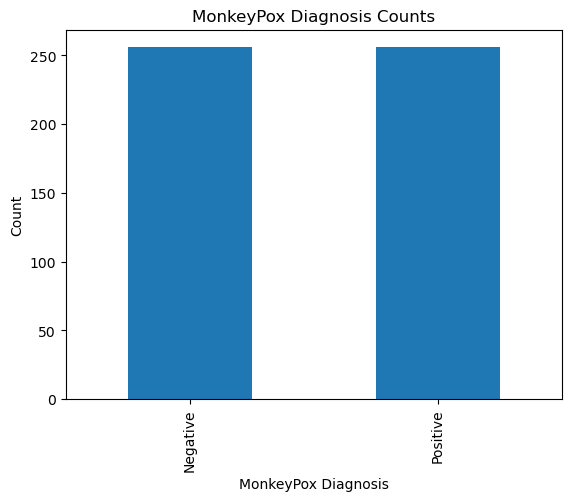

In [62]:
grouped = df.groupby('MonkeyPox').size()

# Create a stacked bar plot of the counts
grouped.plot(kind='bar', stacked=True)

# Add labels and a title
plt.xlabel('MonkeyPox Diagnosis')
plt.ylabel('Count')
plt.title('MonkeyPox Diagnosis Counts')

# Display the plot
plt.show()

**EDA Multivariate Analysis**
As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

<AxesSubplot:>

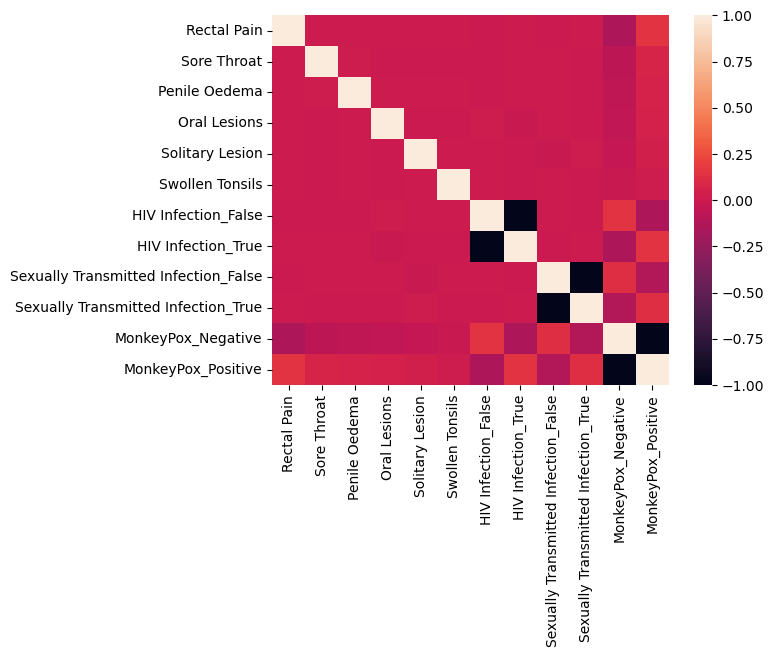

In [64]:
sns.heatmap(df_encoded.corr())

**Impute Missing values**
Missing data arise in almost all statistical analyses. There are many ways to impute missing values; we can impute the missing values by their Mean, median, most frequent, or zero values and use advanced imputation algorithms like KNN, Regularization, etc.

We cannot impute the data with a simple Mean/Median. We must need business knowledge or common insights about the data. If we have domain knowledge, it will add value to the imputation. Some data can be imputed on assumptions.

# 5 Conclusion




- Data Analysis helps to find the basic structure of the dataset.
- Dropped columns that are not adding value to our analysis.
- Performed Feature Engineering by adding some columns which contribute to our analysis.
- Data Transformations have been used to normalize the columns.
- We used different visualizations for EDA like Univariate, Bi-Variate, and Multivariate Analysis.
- Through EDA, we got useful insights

Through EDA analysis we have first cleaned the data by clearing null values and removing unwanted columns. then we have categorized some columns and normalized the data. finally had the bi-variante and multivariate analysis and found out the best columns with in the data for data analysis.